### 顧客の全体像を把握する 10 本ノック

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import pandas as pd
uselog = pd.read_csv('data/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
customer = pd.read_csv('data/customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [4]:
class_master = pd.read_csv('data/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [5]:
campaign_master = pd.read_csv('data/campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


結合していく

In [6]:
pd.unique(customer['class'])

array(['C01', 'C03', 'C02'], dtype=object)

In [7]:
pd.unique(customer['campaign_id'])

array(['CA1', 'CA2', 'CA3'], dtype=object)

結合できそうだ

In [8]:
customer_joined = pd.merge(customer, class_master, on='class', how='left')
customer_joined = pd.merge(customer_joined, campaign_master, on='campaign_id', how='left')
customer_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


In [9]:
customer_joined.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [10]:
customer_joined.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

基本集計として、各軸のデータ数をカウントしてみる

In [11]:
customer_joined.groupby('class_name').count()['customer_id']

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

<BarContainer object of 3 artists>

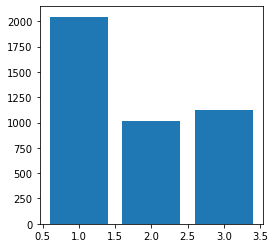

In [12]:
fig = plt.figure(figsize=(4, 4))
x_axis = np.array([1, 2, 3])
y_axis = customer_joined.groupby('class_name').count()['customer_id'].values
plt.bar(x_axis, y_axis)

In [13]:
customer_joined.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

<BarContainer object of 3 artists>

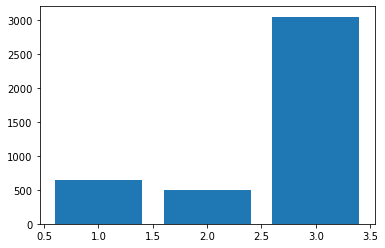

In [14]:
x_axis = np.array([1, 2, 3])
y_axis = customer_joined.groupby('campaign_name').count()['customer_id'].values
plt.bar(x_axis, y_axis)

In [15]:
customer_joined.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

<BarContainer object of 2 artists>

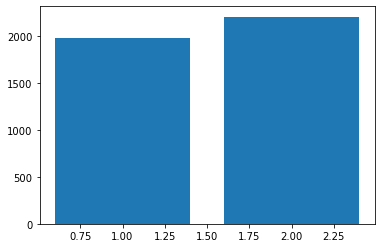

In [16]:
x_axis = np.array([1, 2])
y_axis = customer_joined.groupby('gender').count()['customer_id'].values
plt.bar(x_axis, y_axis)

In [17]:
customer_joined.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

<BarContainer object of 2 artists>

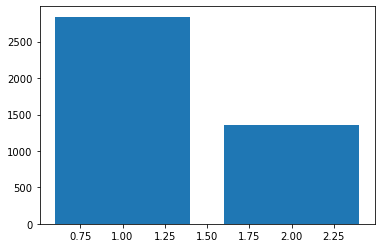

In [18]:
x_axis = np.array([1, 2])
y_axis = customer_joined.groupby('is_deleted').count()['customer_id'].values
plt.bar(x_axis, y_axis)

退会者は 1350 人。

開始日を 2018/4/1 以降に入会した顧客に絞り込むと

In [19]:
customer_joined['start_date'] = pd.to_datetime(customer_joined['start_date'])
customer_start = customer_joined.loc[customer_joined['start_date'] > pd.to_datetime('20180401')]

In [20]:
print(len(customer_start))
customer_start.head()

1361


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,ナイト,6000,入会費無料
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,デイタイム,7500,入会費無料
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,オールタイム,10500,入会費無料


事実計測 : 新規入会は 1361 人

ここから、最新月(2019/03)に在籍していたユーザの情報を抽出

In [21]:
customer_joined['end_date'] = pd.to_datetime(customer_joined['end_date'])

# 統計期間外に退会した、もしくは退会していない顧客
customer_newer = customer_joined.loc[(customer_joined["end_date"] >= pd.to_datetime("20190331")) | (customer_joined["end_date"].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

事実計測 : 2019/3/31 時点で残っていいた顧客は 2953/4192 人

In [22]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

<BarContainer object of 3 artists>

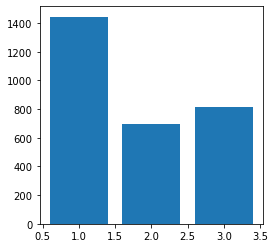

In [23]:
fig = plt.figure(figsize=(4, 4))
x_axis = np.array([1, 2, 3])
y_axis = customer_newer.groupby('class_name').count()['customer_id'].values
plt.bar(x_axis, y_axis)

In [24]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

<BarContainer object of 3 artists>

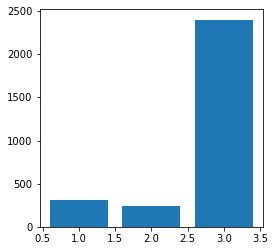

In [25]:
fig = plt.figure(figsize=(4, 4))
x_axis = np.array([1, 2, 3])
y_axis = customer_newer.groupby('campaign_name').count()['customer_id'].values
plt.bar(x_axis, y_axis)


若干通常入会の比率が高いか？

In [26]:
# 全体の場合の「通常」入会費率
3050 / sum([650, 492, 3050]) * 100

72.75763358778626

In [27]:
# 残存顧客の「通常」入会費率
2400 / sum([311, 242, 2400]) * 100

81.27328140873688

微妙…とはいえ「折角かね払ってるんだし…」位の感覚はありそう。

In [28]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

<BarContainer object of 2 artists>

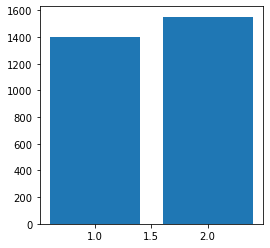

In [29]:
fig = plt.figure(figsize=(4, 4))
x_axis = np.array([1, 2])
y_axis = customer_newer.groupby('gender').count()['customer_id'].values
plt.bar(x_axis, y_axis)

残った人のクラス、キャンペーン、性別を見てみたけど、全体と比較して有意差はない。  
これは、グラフの形からもほぼ同一であることから言える。

### 利用履歴を活用してみる

ユーザ基本情報だと、キャンペーンで入った人より若干通常価格で入会した人の方が残存率が高い。  
それ以上のことがないか、利用履歴から追いかける

In [30]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


月別の利用回数を取得してみる。

In [31]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['year-month'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['year-month', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,year-month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [32]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']  # 'std' も使える
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


利用履歴から定期利用フラグ項目を作成する

In [33]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   log_id       197428 non-null  object        
 1   customer_id  197428 non-null  object        
 2   usedate      197428 non-null  datetime64[ns]
 3   year-month   197428 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.0+ MB


In [34]:
uselog['weekday'] = uselog['usedate'].dt.weekday  # create day of week column
uselog_weekday = uselog.groupby(['customer_id', 'year-month', 'weekday'], as_index = False).count()[['customer_id', 'year-month', 'weekday', 'log_id']] # 顧客と月次/曜日ごとの利用情報取得
uselog_weekday.head()

,customer_id,year-month,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [35]:
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,year-month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


利用数分布が知りたい。

In [36]:
uselog_weekday['count'].agg(['std', 'mean', 'median', 'max', 'min'])

std       1.367527
mean      2.115308
median    1.000000
max       5.000000
min       1.000000
Name: count, dtype: float64

平均 2.12 で、標準偏差 1.37 だと、ざっくり 3.4 までのデータで全体の 75% を超えるのか…  
教科書ではこんなことしてないけど、精度を上げるって意味では覚えておこう。

定期的に利用しているかどうかという点で、期間内で利用があった週をカウントする。  
その上で、毎週利用している顧客を定期利用客とみなす。

そもそも利用期間の開始終了日ってなんじゃろ

In [37]:
print(uselog['usedate'].max())
print(uselog['usedate'].min())

2019-03-31 00:00:00
2018-04-01 00:00:00


利用期間１年かーマジかどの位利用されてんだろ…

In [38]:
uselog_weekday = uselog_weekday.groupby(['customer_id'], as_index=False).max()[['customer_id', 'count']]
uselog_weekday.head()

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5


In [39]:
print(uselog_weekday['count'].max())
print(uselog_weekday['count'].min())

5
1


あー多くて５回か…皆勤賞は居なかったんですね（汗  
利用回数の分布はどうなってる？

利用回数で見たとき、どれが一番多いんだろう？

In [40]:
uselog_weekday.groupby('count', as_index=False).count()[['count', 'customer_id']]

,count,customer_id
0,1,130
1,2,292
2,3,357
3,4,681
4,5,2732


カウント 5 で一つのグループかな…

In [41]:
if True:
    # スコープ汚したくないので if 内で定義
    temp = uselog_weekday.groupby('count', as_index=False).count()
    under4 = np.sum(temp.loc[(temp['count'] < 4)]['customer_id'].values)
    alls = np.sum(temp['customer_id'].values)
    print('{0:.2f}'.format(under4/alls*100))


18.58


結果見る限り、4 で区切るのが妥当なのかなんとも言えないけど、とりあえず教科書をなぞるか

In [42]:
uselog_weekday['routine_flug'] = 0
uselog_weekday['routine_flug'] = uselog_weekday['routine_flug'].where(uselog_weekday['count'] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flug
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


顧客データと履歴データの連結。

In [43]:
customer_joined = pd.merge(customer_joined, uselog_customer, on='customer_id', how='left')
customer_joined = pd.merge(customer_joined, uselog_weekday[['customer_id', 'routine_flug']], on='customer_id', how='left')
customer_joined.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flug
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [44]:
# 他に欠損ないよね？
customer_joined.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flug        0
dtype: int64

`end_date` 以外は欠損なさそうでおｋ

会員期間を作成するけど、end_date 欠損分は 4/30 退会扱いで処理する